In [1]:
import numpy as np
import polars as pl
import polars.selectors as cs
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
import great_tables as tg
import altair as alt

In [2]:
df_path = r'../DATASETS/Social_Network_Ads.csv'

In [3]:
df = pl.read_csv(df_path)

In [4]:
df

Age,EstimatedSalary,Purchased
i64,i64,i64
19,19000,0
35,20000,0
26,43000,0
27,57000,0
19,76000,0
…,…,…
46,41000,1
51,23000,1
50,20000,1


In [5]:
X = df.select(cs.exclude('Purchased'))

In [6]:
y = df.get_column('Purchased')

In [7]:
from sklearn.model_selection import train_test_split

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [9]:
from sklearn.preprocessing import StandardScaler

In [10]:
scaler = StandardScaler()

In [11]:
scaled_X_train = scaler.fit_transform(X_train)
scaled_X_test = scaler.transform(X_test)

In [12]:
from sklearn.svm import SVC

In [13]:
svr_model = SVC(kernel='rbf')

In [14]:
svr_model.fit(scaled_X_train, y_train)

SVC()

In [15]:
predictions = svr_model.predict(scaled_X_test)

In [16]:
predictions

array([1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0,
       1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1,
       1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1,
       0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1])

In [17]:
pl.DataFrame({
    'Actual': y_test,
    'Predicted': predictions,
    'Error': pl.Series(predictions) != pl.Series(y_test)
})

Actual,Predicted,Error
i64,i64,bool
0,1,true
1,1,false
0,0,false
1,1,false
0,0,false
…,…,…
0,0,false
1,1,false
0,0,false


In [18]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, ConfusionMatrixDisplay

In [19]:
accuracy_score(y_test, predictions)

0.93

In [20]:
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.98      0.90      0.94        63
           1       0.86      0.97      0.91        37

    accuracy                           0.93       100
   macro avg       0.92      0.94      0.93       100
weighted avg       0.94      0.93      0.93       100



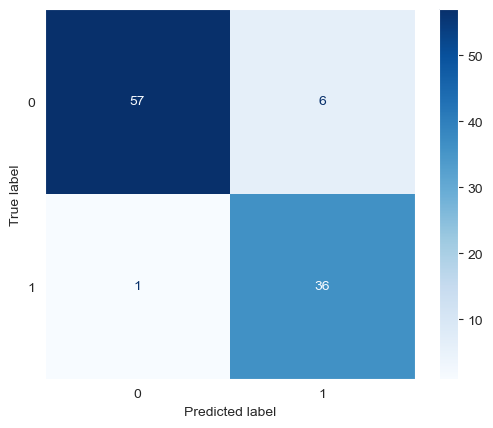

In [21]:
ConfusionMatrixDisplay.from_predictions(y_test, predictions, cmap='Blues').ax_.grid(False)

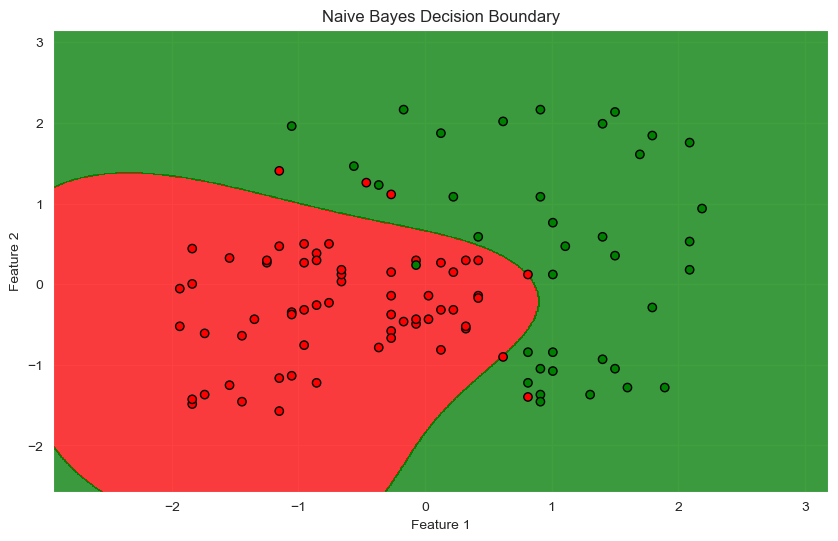

In [22]:
from matplotlib.colors import ListedColormap

X_set, y_set = scaled_X_test[:, :2], y_test.to_numpy()
X1, X2 = np.meshgrid(
    np.arange(X_set[:, 0].min() - 1, X_set[:, 0].max() + 1, 0.01),
    np.arange(X_set[:, 1].min() - 1, X_set[:, 1].max() + 1, 0.01)
)
plt.figure(figsize=(10, 6))
plt.contourf(X1, X2, svr_model.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha=0.75, cmap=ListedColormap(('red', 'green')))
plt.scatter(X_set[:, 0], X_set[:, 1], c=y_set, cmap=ListedColormap(('red', 'green')), edgecolors='k')
plt.title('Naive Bayes Decision Boundary')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()